In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color
from scipy import ndimage as ndi
from skimage import feature
from myplot import *
from skimage.draw import circle_perimeter

In [32]:
def hough_line(_img):
    #canny生成边缘二值图像
    img_gray = color.rgb2gray(_img)
    image = ndi.gaussian_filter(img_gray, 4)
    img = feature.canny(img_gray, sigma=3)
    
     #创建参数空间
    _h = img.shape[0]
    _w = img.shape[1]
    maxdist = int(np.sqrt(_h ** 2 + _w ** 2))
    thetas = np.deg2rad(np.arange(-90, 90))
    rs = np.linspace(-maxdist, maxdist, 2 * maxdist)
    
    #hough变换
    h_space = np.zeros((2 * maxdist, len(thetas)), dtype=np.uint64)
    for i in range(_h):
        for j in range(_w):
            if img[i, j] > 0:
                for k in range(len(thetas)):
                    rho = i * np.cos(thetas[k]) + j * np.sin(thetas[k])
                    h_space[int(rho) + maxdist, k] += 1
                    
    #去除干扰项
    h_space[h_space < 0.5 * np.max(h_space)] = 0
    
    #获取参数空间的rho和theta
    points = []
    for i in range(h_space.shape[0]):
        for j in range(h_space.shape[1]):
            if h_space[i,j] != 0:
                points.append((rs[i], thetas[j]))
    
    #标注直线
    demo = np.copy(_img)
    for each in points:
        rho = each[0]
        for i in range(_img.shape[0]):
            if np.sin(each[1]) !=0:
                yy = rho/np.sin(each[1]) - i * np.cos(each[1])/np.sin(each[1])    
                yy = int(yy)
                if yy < _img.shape[1] and yy >=0:
                    circy, circx = circle_perimeter(i, yy, 5, shape=demo.shape)
                    demo[circy, circx] = (255,0,0)
                    
    #画图
    imglist.append((_img, 'org'))
    imglist.append((demo, 'edge'))

In [33]:
imglist = []
hough_line(io.imread('road.png'))#导入图片

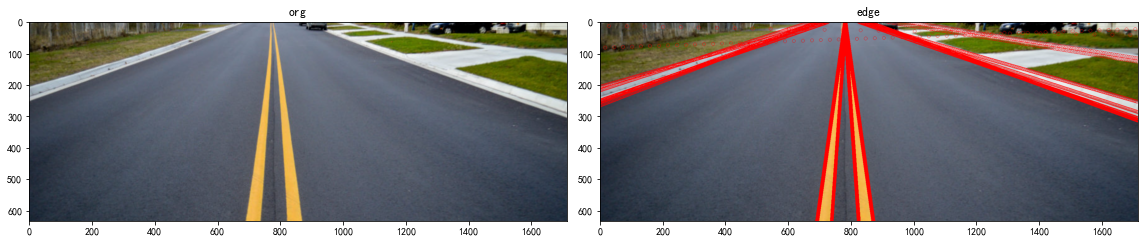

In [34]:
myPlot(imglist)